In [2]:
import os
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1]:
!pip install python-vivid

You should consider upgrading via the 'c:\users\明朗\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2458 sha256=a4049d7209de5b6e2995a6a4161e917cf849760a3361b62233993512f040b68c
  Stored in directory: c:\users\明朗\appdata\local\pip\cache\wheels\e3\dc\eb\3a9468e9322c8284d7a53eab23e7a4bab6f271fff7a5871e2f
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11107 sha256=da39ffc4ab7fcc3ef68e6f3eca1d6ca13e0e3629fbffa0f98861bef7d7c144fb
  Stored in directory: c:\users\明朗\appdata\local\pip\cache\wheels\0c\09\9e\49e21a6840ef7955b06d47394afef0058f0378c0914e48b8b8
Successfully built feather-format pyperclip
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.7
    Uninstalling decorator-5.0.7:
      Successfully uninstalled decorator-5.0.7


In [3]:
INPUT_data = 'data/'
INPUT_photo = os.path.join(INPUT_data, 'photos/')

OUTPUT = 'out_put/'
os.makedirs(OUTPUT, exist_ok=True)

photo_pathes = glob(os.path.join(INPUT_photo, '*.jpg'))

In [6]:
train_df = pd.read_csv(os.path.join(INPUT_data, 'train.csv'))
test_df = pd.read_csv(os.path.join(INPUT_data, 'test.csv'))

material_df = pd.read_csv(os.path.join(INPUT_data, 'materials.csv'))
technique_df = pd.read_csv(os.path.join(INPUT_data, 'techniques.csv'))

In [7]:
!pip install matplotlib_venn

  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.6-py3-none-any.whl size=32062 sha256=00cc35b487bafaef9f08efe4a11b5bb6868066b395c2c3cf6bdaa645016f71c8
  Stored in directory: c:\users\明朗\appdata\local\pip\cache\wheels\42\1c\65\1a733895cd94885d1a97eee84ec7595ff7fddc277a45bcacf5
Successfully built matplotlib-venn


You should consider upgrading via the 'c:\users\明朗\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [8]:
from matplotlib_venn import venn2

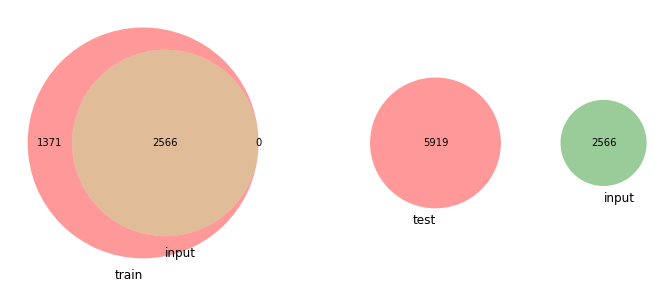

In [9]:
input_df = technique_df

fig, axes = plt.subplots(figsize=(12,5), ncols=2)

venn2(subsets=(
    set(train_df['object_id']), set(input_df['object_id'])),set_labels=('train', 'input'), ax=axes[0])

venn2(subsets = (set(test_df['object_id']), set(input_df['object_id'])), set_labels=('test', 'input'), ax=axes[1])

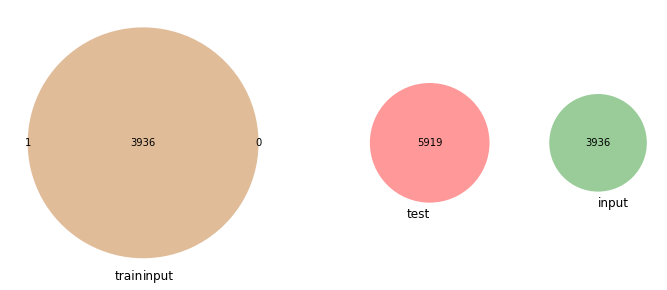

In [10]:
input_df = material_df

fig, axes = plt.subplots(figsize=(12,5), ncols=2)

venn2(subsets=(set(train_df['object_id']), set(input_df['object_id'])), set_labels=('train', 'input'), ax=axes[0])
venn2(subsets=(set(test_df['object_id']), set(input_df['object_id'])), set_labels=('test', 'input'), ax=axes[1])

In [11]:
train_df.head()

,object_id,sorting_date,art_series_id,target
0,002bff09b09998d0be65,1631,509357f67692a6a45626,1
1,00309fb1ef05416f9c1f,1900,7987b47bbe5dc3039179,3
2,003a1562e97f79ba96dc,1834,ded7c3c9636708e5b14c,3
3,004890880e8e7431147b,1743,582ac2d7f0cef195b605,2
4,00718c32602425f504c1,1885,64c907f0c08dce4fb8e8,3


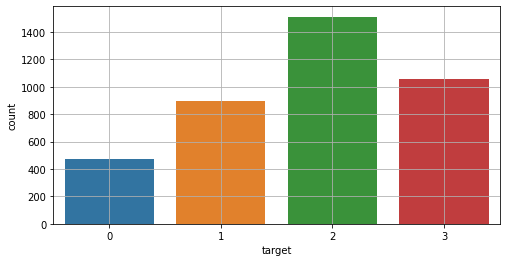

In [12]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=train_df, x='target', ax=ax)
ax.grid()

In [13]:
train_df['target'].value_counts().sort_index()

0     475
1     896
2    1511
3    1055
Name: target, dtype: int64

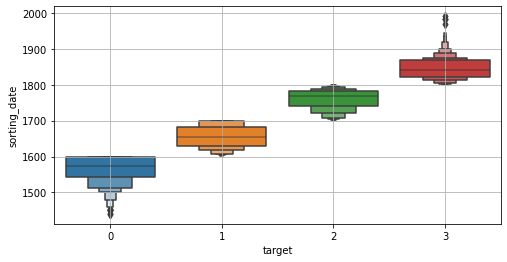

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxenplot(data=train_df, x='target', y='sorting_date', ax=ax)
ax.grid()

In [15]:
train_df.groupby('target')['sorting_date'].agg(['min', 'max', 'median', 'size'])

,min,max,median,size
target,,,,
0,1440,1600,1574,475
1,1601,1700,1655,896
2,1701,1800,1770,1511
3,1801,1991,1841,1055


In [38]:
##image functions
def to_img_path(object_id):
    return os.path.join(INPUT_photo, f'{object_id}.jpg')

def read_image(object_id):
    return Image.open(to_img_path(object_id))

In [51]:
train_df.head()

,object_id,sorting_date,art_series_id,target
0,002bff09b09998d0be65,1631,509357f67692a6a45626,1
1,00309fb1ef05416f9c1f,1900,7987b47bbe5dc3039179,3
2,003a1562e97f79ba96dc,1834,ded7c3c9636708e5b14c,3
3,004890880e8e7431147b,1743,582ac2d7f0cef195b605,2
4,00718c32602425f504c1,1885,64c907f0c08dce4fb8e8,3


In [45]:
meta_df = train_df[['target', 'object_id']].copy()
meta_df['object_path'] = meta_df['object_id'].map(to_img_path)

meta_df.head



<bound method NDFrame.head of       target             object_id                           object_path
0          1  002bff09b09998d0be65  data/photos/002bff09b09998d0be65.jpg
1          3  00309fb1ef05416f9c1f  data/photos/00309fb1ef05416f9c1f.jpg
2          3  003a1562e97f79ba96dc  data/photos/003a1562e97f79ba96dc.jpg
3          2  004890880e8e7431147b  data/photos/004890880e8e7431147b.jpg
4          3  00718c32602425f504c1  data/photos/00718c32602425f504c1.jpg
...      ...                   ...                                   ...
3932       3  ffa3259fff8e6f3818a1  data/photos/ffa3259fff8e6f3818a1.jpg
3933       1  ffd4d361756587883e48  data/photos/ffd4d361756587883e48.jpg
3934       2  ffd794b7b311b7b7fd92  data/photos/ffd794b7b311b7b7fd92.jpg
3935       3  ffe49bba69d06446de7e  data/photos/ffe49bba69d06446de7e.jpg
3936       1  ffe77db10be3400bed53  data/photos/ffe77db10be3400bed53.jpg

[3937 rows x 3 columns]>

In [47]:
meta_df = test_df[[ 'object_id']].copy()
meta_df['object_path'] = meta_df['object_id'].map(to_img_path)
meta_

<bound method NDFrame.head of                  object_id                           object_path
0     0009e50b94be36ccad39  data/photos/0009e50b94be36ccad39.jpg
1     000bd5e82eb22f199f44  data/photos/000bd5e82eb22f199f44.jpg
2     0015f44de1854f617516  data/photos/0015f44de1854f617516.jpg
3     00388a678879ba1efa27  data/photos/00388a678879ba1efa27.jpg
4     005e1e7c6496902d23f3  data/photos/005e1e7c6496902d23f3.jpg
...                    ...                                   ...
5914  ffbe65ad399b632dcbd0  data/photos/ffbe65ad399b632dcbd0.jpg
5915  ffd7b2d646c0320c311a  data/photos/ffd7b2d646c0320c311a.jpg
5916  ffdb93ede17d4501e530  data/photos/ffdb93ede17d4501e530.jpg
5917  ffe111402004b0ed46b4  data/photos/ffe111402004b0ed46b4.jpg
5918  fffdb3c248a7dcd3cccf  data/photos/fffdb3c248a7dcd3cccf.jpg

[5919 rows x 2 columns]>

In [50]:
meta_df.get('target', -1)

-1

In [54]:
print(f'-------------{1: d} step---------------')

-------------{1: d} step---------------
